In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import warnings
import datetime
import geopandas as gpd
import folium
import time
import my_code
warnings.filterwarnings('ignore')

import seaborn as sns

In [2]:
data = pd.read_csv('/Users/alket/Desktop/dati/new_data2_Modena_backfill_forwfill.csv',index_col = 0, parse_dates=True)
data

,date,cell_num,nr_people,hours,minutes
0,2017-04-16,389-1015,361.0,0.0,0.0
1353,2017-04-16,389-1015,367.0,0.0,15.0
2706,2017-04-16,389-1015,359.0,0.0,30.0
4059,2017-04-16,389-1015,354.0,0.0,45.0
5412,2017-04-16,389-1015,350.0,1.0,0.0
...,...,...,...,...,...
15970811,2017-08-16,421-1055,17.0,22.0,45.0
15972164,2017-08-16,421-1055,17.0,23.0,0.0
15973517,2017-08-16,421-1055,17.0,23.0,15.0
15974870,2017-08-16,421-1055,18.0,23.0,30.0


In [4]:
agg_by_cell = data.groupby(['cell_num'])

In [6]:
counter = 0
for i, k in agg_by_cell: 
    print(i, k)
    counter += 1
    if counter > 1 : break

389-1015                 date  cell_num  nr_people  hours  minutes
0         2017-04-16  389-1015      361.0    0.0      0.0
1353      2017-04-16  389-1015      367.0    0.0     15.0
2706      2017-04-16  389-1015      359.0    0.0     30.0
4059      2017-04-16  389-1015      354.0    0.0     45.0
5412      2017-04-16  389-1015      350.0    1.0      0.0
...              ...       ...        ...    ...      ...
15969459  2017-08-16  389-1015      269.0   22.0     45.0
15970812  2017-08-16  389-1015      268.0   23.0      0.0
15972165  2017-08-16  389-1015      271.0   23.0     15.0
15973518  2017-08-16  389-1015      266.0   23.0     30.0
15974871  2017-08-16  389-1015      266.0   23.0     45.0

[11808 rows x 5 columns]
389-1016                 date  cell_num  nr_people  hours  minutes
1         2017-04-16  389-1016      188.0    0.0      0.0
1354      2017-04-16  389-1016      191.0    0.0     15.0
2707      2017-04-16  389-1016      186.0    0.0     30.0
4060      2017-04-16  389-10

In [57]:
def get_corr_adiacent_cells(cell, index):
    counter = 0
    adiacent_cells = []
    s = cell.split('-')
    row = int(s[0])
    col = int(s[1])
    rowup = row+index
    rowdown = row-index
    coldes = col+index
    colsin = col-index
    cell1 = str(row)+'-'+str(coldes)
    cell2 = str(row)+'-'+str(colsin)
    cell3 = str(rowup)+'-'+str(col)
    cell4 = str(rowdown)+'-'+str(col)
    
    cell5 = str(rowup)+'-'+str(coldes)
    cell6 = str(rowup)+'-'+str(colsin)
    cell7 = str(rowdown)+'-'+str(coldes)
    cell8 = str(rowdown)+'-'+str(colsin)
    adiacent_cells.extend([cell1, cell2, cell3, cell4, cell5, cell6, cell7, cell8])
        
    return adiacent_cells

In [92]:
cells2be_correlated = ['400-1035', '400-1036', '400-1037', '400-1028', '400-1029', '400-1032',
                       '401-1035', '401-1038', '401-1041', '401-1033', '401-1029', '401-1032',
                       '402-1043', '402-1039', '402-1033', '402-1035', '402-1037', '402-1031',
                       '403-1043', '403-1031', '403-1034', '403-1036', '403-1037', '403-1039',
                       '404-1036', '404-1037', '404-1038', '404-1040', '404-1042', '404-1035',
                       '409-1036', '409-1037', '409-1038', '409-1040', '409-1042', '409-1035',
                       '408-1036', '408-1037', '408-1038', '408-1040', '408-1042', '408-1035',
                       '407-1035', '407-1037', '407-1039', '407-1041', '407-1042', '407-1036',
                       '405-1031', '405-1032', '405-1034', '405-1036', '405-1038', '405-1042',
                       '406-1034', '406-1031', '406-1033', '406-1035', '406-1039', '406-1040']

In [125]:
data2dict = {}
for num in range(12):
    num = num+1
    #print('step = ', num)
    cell2mean = []
    for cell2c in cells2be_correlated:
        try:
            adiacent_cells = get_corr_adiacent_cells(cell2c, num)
        except:
            'KeyError'
        corrlist = []
        try: 
            cell_itself = agg_by_cell.get_group(cell2c)
        except: 
            'KeyError'
        corrlist.append(cell_itself['nr_people'].values)
        for i in adiacent_cells: 
            try: 
                cell_i = agg_by_cell.get_group(i)
                cell_i = cell_i['nr_people'].values
                corrlist.append(cell_i)
            except: 
                'KeyError'
        corr = np.array(corrlist)
        corr_matrix = np.corrcoef(corr)
        mean = np.median(corr_matrix)
        cell2mean.append(mean)
    print(num , np.mean(np.array(cell2mean)))
    data2dict[num] = np.mean(np.array(cell2mean))

1 0.9701522647476649
2 0.9237037160615446
3 0.8836346044349798
4 0.8477324580198012
5 0.8196081358792321
6 0.7959854312765725
7 0.779902662386909
8 0.7562641819942427
9 0.7295993042112288
10 0.7241232679837538
11 0.7088450238790592
12 0.7125188949799237


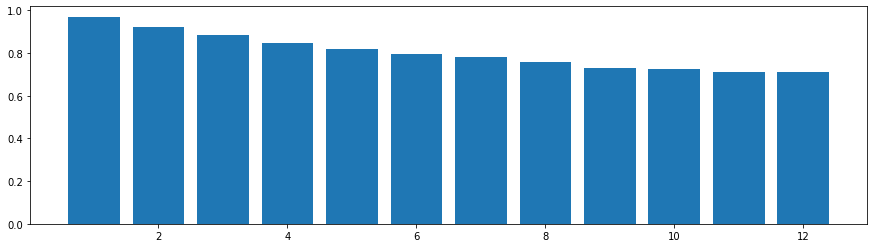

In [126]:
a_dictionary = {"a": 1, "b": 2, "c": 3}
keys = data2dict.keys()
values = data2dict.values()

plt.figure(figsize = (15,4))
plt.bar(keys, values)
plt.show()

In [129]:
data2dict = {}
for num in range(12):
    num = num+1
    #print('step ', num)
    for cell2c in cells2be_correlated:
        mean2step = []
        try:
            adiacent_cells = get_corr_adiacent_cells(cell2c, num)
        except:
            'KeyError'
        corrlist = []
        try: 
            cell_itself = agg_by_cell.get_group(cell2c)
        except: 
            'KeyError'
            cell_itself = cell_itself['nr_people'].pct_change().values
            cell_itself = cell_itself[1:]
            corrlist.append()
        for i in adiacent_cells: 
            try: 
                cell_i = agg_by_cell.get_group(i)
                cell_i = cell_i['nr_people'].pct_change().values
                cell_i = cell_i[1:]
                #print(cell_i)
                corrlist.append(cell_i)
            except: 
                'KeyError'
        corr = np.array(corrlist)
        corr_matrix = np.corrcoef(corr)
        mean = np.mean(corr_matrix)
        
        mean2step.append(mean)
    print(num, np.mean(np.array(mean2step))) 
    data2dict[num] = np.mean(np.array(mean2step))

1 0.5959636424945018
2 0.33681806281841
3 0.2592635777422126
4 0.19234370827283417
5 0.1673162057814244
6 0.1669594521820894
7 0.16569644353278548
8 0.13312477208219792
9 0.12702198931897352
10 0.12362802728248097
11 0.10930625254369519
12 0.14010193902918983


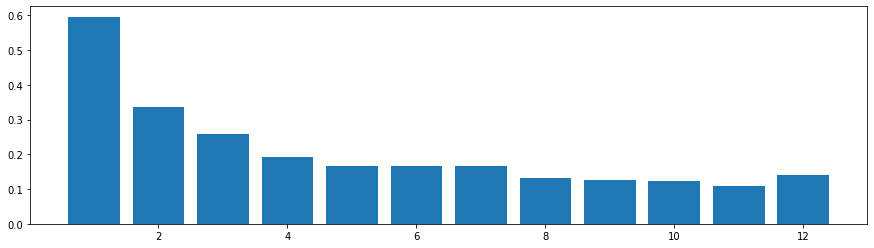

In [130]:
keys = data2dict.keys()
values = data2dict.values()

plt.figure(figsize = (15,4))
plt.bar(keys, values)
plt.show()